In [89]:
# ID3 Decision Tree Classification on Titanic Dataset
# https://www.kaggle.com/datasets/yasserh/titanic-dataset/data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

# Load the dataset
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
print(df_titanic.info()) # shows columns names, number of non-null values and data type
print(df_titanic.isnull().sum()) # shows number of null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

# Handle Missing Values


In [91]:
df_processed = df_titanic.copy()

imputer_age = SimpleImputer(strategy='median') # cus mean is sensitive to outliers.
df_processed[['Age']] = imputer_age.fit_transform(df_processed[['Age']])

imputer_embarked = SimpleImputer(strategy='most_frequent')
df_processed[['Embarked']] = imputer_embarked.fit_transform(df_processed[['Embarked']])

df_processed.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Feature Selection

In [92]:
df_processed.drop('Cabin', axis=1, inplace=True) # Malo4 lazma + most of it is null
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] # Select relevant features

# Spliting



In [93]:
X = df_processed[features] # Processed data
y = df_processed['Survived'] # Predition

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (712, 7)
Testing set size: (179, 7)


# Encoding


In [94]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
le_title = LabelEncoder()

X_train['Sex'] = le_sex.fit_transform(X_train['Sex'])
X_test['Sex'] = le_sex.transform(X_test['Sex'])

X_train['Embarked'] = le_embarked.fit_transform(X_train['Embarked'])
X_test['Embarked'] = le_embarked.transform(X_test['Embarked'])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,1,28.0,0,0,56.4958,2
481,2,1,28.0,0,0,0.0000,2
527,1,1,28.0,0,0,221.7792,2
855,3,0,18.0,0,1,9.3500,2
801,2,0,31.0,1,1,26.2500,2


# Scaling


In [95]:
sc = StandardScaler()
cols_to_scale = ['Age', 'Fare']

X_train[cols_to_scale] = sc.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = sc.transform(X_test[cols_to_scale])

In [96]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,1,-0.112078,0,0,0.513812,2
481,2,1,-0.112078,0,0,-0.662563,2
527,1,1,-0.112078,0,0,3.955399,2
855,3,0,-0.879807,0,1,-0.467874,2
801,2,0,0.118241,1,1,-0.115977,2


# OVER SAMPLING

In [97]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

273
439
439
439


# Training & Visuals

Model Accuracy: 0.7877


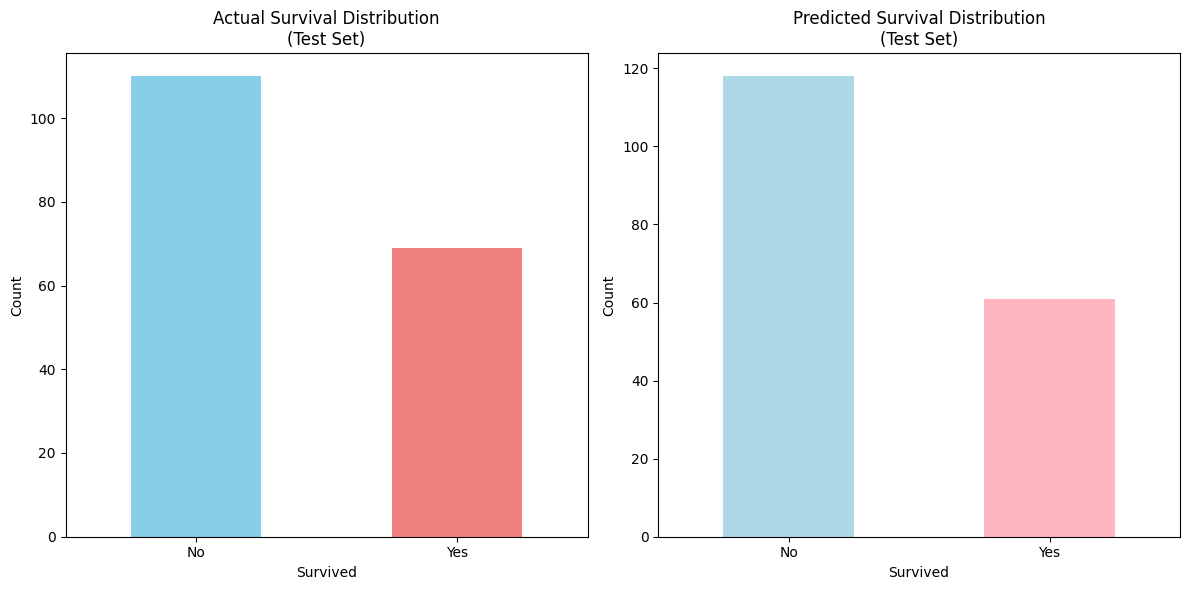

In [98]:
id3_model = DecisionTreeClassifier(
    criterion='entropy',  # This makes it ID3-like
    random_state=42,
    max_depth=5  # Limit depth for better visualization
)
id3_model.fit(X_train, y_train)

# Prediction
y_pred = id3_model.predict(X_test)
y_pred_proba = id3_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Actual vs Predicted comparison
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Correct': y_test.values == y_pred
})

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
comparison_df['Actual'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Actual Survival Distribution\n(Test Set)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

plt.subplot(1, 2, 2)
comparison_df['Predicted'].value_counts().plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Predicted Survival Distribution\n(Test Set)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.savefig('id3_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

### Confusion Matrix


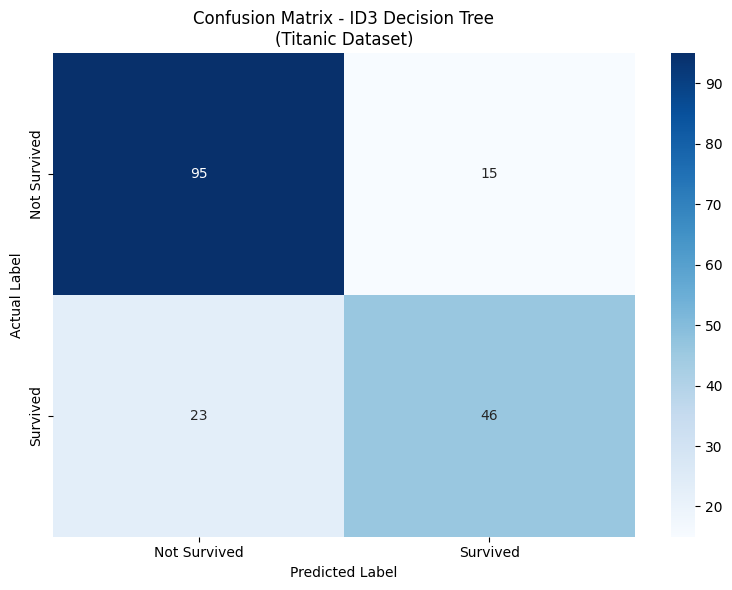

In [99]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - ID3 Decision Tree\n(Titanic Dataset)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

# This is the line that makes it appear!
plt.show()